#  Data Exploration and Preparation

In [32]:
import pandas as pd

In [33]:
transactions=pd.read_csv("../txn_data.csv")
transactions.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D9_card1_addr1_mean,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std
0,2987000.0,86400.0,68.5,4,12926.0,-1.0,50.0,1,42.0,1,...,-1.000000,-1.000000,-1.000000,-1.000000,288.08070,71.89166,407.99927,-1.00000,407.99927,-1.000000
1,2987001.0,86401.0,29.0,4,1755.0,304.0,50.0,2,2.0,1,...,0.466666,0.355268,0.770833,0.029462,394.82760,243.82156,275.23820,172.36115,357.80423,252.502500
2,2987002.0,86469.0,59.0,4,3663.0,390.0,50.0,3,66.0,2,...,-1.000000,-1.000000,-1.000000,-1.000000,301.84937,184.57118,388.70435,197.34755,710.10596,0.197533
3,2987003.0,86499.0,50.0,4,17132.0,467.0,50.0,2,17.0,2,...,0.781250,0.157288,0.750000,-1.000000,393.77222,241.99162,428.57175,217.96260,464.11465,184.401720
4,2987004.0,86506.0,50.0,1,3497.0,414.0,50.0,2,2.0,1,...,-1.000000,-1.000000,-1.000000,-1.000000,432.59033,245.09677,-1.00000,-1.00000,-1.00000,-1.000000


In [34]:
label=pd.read_csv("../label.csv")
label.head()

,TransactionID,isFraud
0,2987000.0,0
1,2987001.0,0
2,2987002.0,0
3,2987003.0,0
4,2987004.0,0


In [35]:
new_df=pd.merge(transactions, label, on=['TransactionID'])
new_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std,isFraud
0,2987000.0,86400.0,68.5,4,12926.0,-1.0,50.0,1,42.0,1,...,-1.000000,-1.000000,-1.000000,288.08070,71.89166,407.99927,-1.00000,407.99927,-1.000000,0
1,2987001.0,86401.0,29.0,4,1755.0,304.0,50.0,2,2.0,1,...,0.355268,0.770833,0.029462,394.82760,243.82156,275.23820,172.36115,357.80423,252.502500,0
2,2987002.0,86469.0,59.0,4,3663.0,390.0,50.0,3,66.0,2,...,-1.000000,-1.000000,-1.000000,301.84937,184.57118,388.70435,197.34755,710.10596,0.197533,0
3,2987003.0,86499.0,50.0,4,17132.0,467.0,50.0,2,17.0,2,...,0.157288,0.750000,-1.000000,393.77222,241.99162,428.57175,217.96260,464.11465,184.401720,0
4,2987004.0,86506.0,50.0,1,3497.0,414.0,50.0,2,2.0,1,...,-1.000000,-1.000000,-1.000000,432.59033,245.09677,-1.00000,-1.00000,-1.00000,-1.000000,0


In [36]:
new_df.shape

(590540, 243)

# Modeling

In [55]:
import numpy as np
from matplotlib import pyplot as plt
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [85]:
# get the labels
y = new_df.isFraud#.values
x = (new_df.drop(['isFraud'], axis=1))#.values


In [86]:
#
# Create training and validation sets
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)




In [87]:
# # # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)


In [88]:
x_train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D9_card1_addr1_mean,D9_card1_addr1_std,D9_card1_addr1_P_emaildomain_mean,D9_card1_addr1_P_emaildomain_std,D11_card1_mean,D11_card1_std,D11_card1_addr1_mean,D11_card1_addr1_std,D11_card1_addr1_P_emaildomain_mean,D11_card1_addr1_P_emaildomain_std
366215,3353215.0,9086107.0,49.000,4,16188.0,221.0,50.0,3,126.0,2,...,0.567164,0.335924,0.576389,0.339355,382.30620,239.79050,374.35138,240.09386,387.38990,254.683350
437716,3424716.0,11063532.0,20.534,0,16147.0,173.0,85.0,2,97.0,1,...,0.479902,0.343147,0.611111,0.385201,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.000000
578692,3565692.0,15413004.0,22.000,3,15314.0,300.0,50.0,2,124.0,2,...,0.513889,0.387149,0.458333,0.530330,392.44696,221.86519,503.47824,221.41882,388.71484,83.412605
364816,3351816.0,9059836.0,86.000,4,11598.0,11.0,50.0,3,66.0,2,...,-1.000000,-1.000000,-1.000000,-1.000000,314.04800,197.57013,356.72644,95.83051,312.79092,50.465942
223792,3210792.0,5271226.0,235.970,4,6482.0,390.0,50.0,3,126.0,2,...,0.449074,0.263738,0.611111,0.024056,615.23900,258.12933,592.21027,249.47243,743.16560,186.842220


In [89]:
#
# Create the LightGBM data containers
#
categorical_features = [c for c, col in enumerate(transactions.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)

In [90]:
#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)


/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.847246
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.866408
[3]	valid_0's auc: 0.874225
[4]	valid_0's auc: 0.878768
[5]	valid_0's auc: 0.881359
[6]	valid_0's auc: 0.883974
[7]	valid_0's auc: 0.886254
[8]	valid_0's auc: 0.888
[9]	valid_0's auc: 0.8897
[10]	valid_0's auc: 0.890786
[11]	valid_0's auc: 0.892547
[12]	valid_0's auc: 0.89352
[13]	valid_0's auc: 0.89474
[14]	valid_0's auc: 0.8954
[15]	valid_0's auc: 0.896114
[16]	valid_0's auc: 0.896979
[17]	valid_0's auc: 0.897651
[18]	valid_0's auc: 0.898196
[19]	valid_0's auc: 0.898854
[20]	valid_0's auc: 0.899405
[21]	valid_0's auc: 0.900021
[22]	valid_0's auc: 0.900635
[23]	valid_0's auc: 0.901172
[24]	valid_0's auc: 0.901709
[25]	valid_0's auc: 0.902262
[26]	valid_0's auc: 0.902837
[27]	valid_0's auc: 0.903194
[28]	valid_0's auc: 0.903552
[29]	valid_0's auc: 0.903771
[30]	valid_0's auc: 0.904252
[31]	valid_0's auc: 0.904741
[32]	valid_0's auc: 0.905254
[33]	valid_0's auc: 0.90572

[280]	valid_0's auc: 0.946167
[281]	valid_0's auc: 0.946243
[282]	valid_0's auc: 0.946296
[283]	valid_0's auc: 0.946372
[284]	valid_0's auc: 0.946426
[285]	valid_0's auc: 0.946449
[286]	valid_0's auc: 0.946426
[287]	valid_0's auc: 0.946413
[288]	valid_0's auc: 0.946469
[289]	valid_0's auc: 0.946483
[290]	valid_0's auc: 0.946546
[291]	valid_0's auc: 0.946615
[292]	valid_0's auc: 0.946684
[293]	valid_0's auc: 0.946713
[294]	valid_0's auc: 0.946797
[295]	valid_0's auc: 0.946918
[296]	valid_0's auc: 0.946972
[297]	valid_0's auc: 0.946998
[298]	valid_0's auc: 0.947008
[299]	valid_0's auc: 0.947046
[300]	valid_0's auc: 0.947163
[301]	valid_0's auc: 0.947236
[302]	valid_0's auc: 0.947277
[303]	valid_0's auc: 0.947365
[304]	valid_0's auc: 0.947449
[305]	valid_0's auc: 0.947493
[306]	valid_0's auc: 0.947566
[307]	valid_0's auc: 0.947624
[308]	valid_0's auc: 0.947667
[309]	valid_0's auc: 0.947669
[310]	valid_0's auc: 0.947726
[311]	valid_0's auc: 0.947781
[312]	valid_0's auc: 0.947803
[313]	vali

[556]	valid_0's auc: 0.957844
[557]	valid_0's auc: 0.957891
[558]	valid_0's auc: 0.95791
[559]	valid_0's auc: 0.957935
[560]	valid_0's auc: 0.95798
[561]	valid_0's auc: 0.95798
[562]	valid_0's auc: 0.958006
[563]	valid_0's auc: 0.958029
[564]	valid_0's auc: 0.958067
[565]	valid_0's auc: 0.958102
[566]	valid_0's auc: 0.958125
[567]	valid_0's auc: 0.958155
[568]	valid_0's auc: 0.958194
[569]	valid_0's auc: 0.9582
[570]	valid_0's auc: 0.958205
[571]	valid_0's auc: 0.958219
[572]	valid_0's auc: 0.95822
[573]	valid_0's auc: 0.958268
[574]	valid_0's auc: 0.958293
[575]	valid_0's auc: 0.958305
[576]	valid_0's auc: 0.95835
[577]	valid_0's auc: 0.958355
[578]	valid_0's auc: 0.958354
[579]	valid_0's auc: 0.958358
[580]	valid_0's auc: 0.958381
[581]	valid_0's auc: 0.958415
[582]	valid_0's auc: 0.958479
[583]	valid_0's auc: 0.958497
[584]	valid_0's auc: 0.958519
[585]	valid_0's auc: 0.958562
[586]	valid_0's auc: 0.958576
[587]	valid_0's auc: 0.958615
[588]	valid_0's auc: 0.958657
[589]	valid_0's a

[836]	valid_0's auc: 0.963167
[837]	valid_0's auc: 0.963184
[838]	valid_0's auc: 0.963195
[839]	valid_0's auc: 0.963204
[840]	valid_0's auc: 0.963196
[841]	valid_0's auc: 0.963211
[842]	valid_0's auc: 0.963239
[843]	valid_0's auc: 0.963245
[844]	valid_0's auc: 0.96327
[845]	valid_0's auc: 0.963275
[846]	valid_0's auc: 0.963289
[847]	valid_0's auc: 0.963292
[848]	valid_0's auc: 0.963296
[849]	valid_0's auc: 0.963304
[850]	valid_0's auc: 0.963349
[851]	valid_0's auc: 0.963371
[852]	valid_0's auc: 0.963393
[853]	valid_0's auc: 0.9634
[854]	valid_0's auc: 0.963401
[855]	valid_0's auc: 0.963434
[856]	valid_0's auc: 0.963448
[857]	valid_0's auc: 0.963477
[858]	valid_0's auc: 0.963487
[859]	valid_0's auc: 0.963499
[860]	valid_0's auc: 0.963504
[861]	valid_0's auc: 0.963528
[862]	valid_0's auc: 0.963539
[863]	valid_0's auc: 0.963588
[864]	valid_0's auc: 0.96361
[865]	valid_0's auc: 0.963642
[866]	valid_0's auc: 0.96365
[867]	valid_0's auc: 0.963669
[868]	valid_0's auc: 0.963684
[869]	valid_0's

[1110]	valid_0's auc: 0.966542
[1111]	valid_0's auc: 0.966547
[1112]	valid_0's auc: 0.966553
[1113]	valid_0's auc: 0.96655
[1114]	valid_0's auc: 0.966568
[1115]	valid_0's auc: 0.966578
[1116]	valid_0's auc: 0.96657
[1117]	valid_0's auc: 0.966584
[1118]	valid_0's auc: 0.966587
[1119]	valid_0's auc: 0.966605
[1120]	valid_0's auc: 0.966611
[1121]	valid_0's auc: 0.966606
[1122]	valid_0's auc: 0.966607
[1123]	valid_0's auc: 0.966613
[1124]	valid_0's auc: 0.966617
[1125]	valid_0's auc: 0.966624
[1126]	valid_0's auc: 0.966622
[1127]	valid_0's auc: 0.966639
[1128]	valid_0's auc: 0.96666
[1129]	valid_0's auc: 0.966668
[1130]	valid_0's auc: 0.966691
[1131]	valid_0's auc: 0.966692
[1132]	valid_0's auc: 0.966718
[1133]	valid_0's auc: 0.966739
[1134]	valid_0's auc: 0.966761
[1135]	valid_0's auc: 0.96679
[1136]	valid_0's auc: 0.966795
[1137]	valid_0's auc: 0.966811
[1138]	valid_0's auc: 0.966811
[1139]	valid_0's auc: 0.966812
[1140]	valid_0's auc: 0.966808
[1141]	valid_0's auc: 0.966798
[1142]	valid

[1382]	valid_0's auc: 0.968539
[1383]	valid_0's auc: 0.968534
[1384]	valid_0's auc: 0.96854
[1385]	valid_0's auc: 0.96854
[1386]	valid_0's auc: 0.968555
[1387]	valid_0's auc: 0.968562
[1388]	valid_0's auc: 0.968572
[1389]	valid_0's auc: 0.968579
[1390]	valid_0's auc: 0.968583
[1391]	valid_0's auc: 0.968568
[1392]	valid_0's auc: 0.968583
[1393]	valid_0's auc: 0.968598
[1394]	valid_0's auc: 0.968583
[1395]	valid_0's auc: 0.968584
[1396]	valid_0's auc: 0.968578
[1397]	valid_0's auc: 0.968575
[1398]	valid_0's auc: 0.968576
[1399]	valid_0's auc: 0.968564
[1400]	valid_0's auc: 0.968572
[1401]	valid_0's auc: 0.968574
[1402]	valid_0's auc: 0.968587
[1403]	valid_0's auc: 0.9686
[1404]	valid_0's auc: 0.968622
[1405]	valid_0's auc: 0.968619
[1406]	valid_0's auc: 0.968627
[1407]	valid_0's auc: 0.968619
[1408]	valid_0's auc: 0.968614
[1409]	valid_0's auc: 0.968623
[1410]	valid_0's auc: 0.968621
[1411]	valid_0's auc: 0.968622
[1412]	valid_0's auc: 0.968631
[1413]	valid_0's auc: 0.96863
[1414]	valid_

[1652]	valid_0's auc: 0.969521
[1653]	valid_0's auc: 0.969527
[1654]	valid_0's auc: 0.969518
[1655]	valid_0's auc: 0.969514
[1656]	valid_0's auc: 0.969507
[1657]	valid_0's auc: 0.969507
[1658]	valid_0's auc: 0.969502
[1659]	valid_0's auc: 0.969501
[1660]	valid_0's auc: 0.969506
[1661]	valid_0's auc: 0.969516
[1662]	valid_0's auc: 0.969521
[1663]	valid_0's auc: 0.969524
[1664]	valid_0's auc: 0.969525
[1665]	valid_0's auc: 0.969522
[1666]	valid_0's auc: 0.969536
[1667]	valid_0's auc: 0.96954
[1668]	valid_0's auc: 0.969543
[1669]	valid_0's auc: 0.969546
[1670]	valid_0's auc: 0.969539
[1671]	valid_0's auc: 0.969545
[1672]	valid_0's auc: 0.96954
[1673]	valid_0's auc: 0.969539
[1674]	valid_0's auc: 0.96954
[1675]	valid_0's auc: 0.969544
[1676]	valid_0's auc: 0.96954
[1677]	valid_0's auc: 0.969555
[1678]	valid_0's auc: 0.969554
[1679]	valid_0's auc: 0.96955
[1680]	valid_0's auc: 0.969564
[1681]	valid_0's auc: 0.96959
[1682]	valid_0's auc: 0.969598
[1683]	valid_0's auc: 0.969606
[1684]	valid_0

[1922]	valid_0's auc: 0.970545
[1923]	valid_0's auc: 0.970548
[1924]	valid_0's auc: 0.970561
[1925]	valid_0's auc: 0.970569
[1926]	valid_0's auc: 0.97056
[1927]	valid_0's auc: 0.970572
[1928]	valid_0's auc: 0.970563
[1929]	valid_0's auc: 0.970574
[1930]	valid_0's auc: 0.970555
[1931]	valid_0's auc: 0.970538
[1932]	valid_0's auc: 0.970546
[1933]	valid_0's auc: 0.970544
[1934]	valid_0's auc: 0.970548
[1935]	valid_0's auc: 0.970533
[1936]	valid_0's auc: 0.970537
[1937]	valid_0's auc: 0.970543
[1938]	valid_0's auc: 0.970536
[1939]	valid_0's auc: 0.97053
[1940]	valid_0's auc: 0.970539
[1941]	valid_0's auc: 0.970544
[1942]	valid_0's auc: 0.970552
[1943]	valid_0's auc: 0.970558
[1944]	valid_0's auc: 0.970532
[1945]	valid_0's auc: 0.970535
[1946]	valid_0's auc: 0.970521
[1947]	valid_0's auc: 0.970526
[1948]	valid_0's auc: 0.970515
[1949]	valid_0's auc: 0.970518
[1950]	valid_0's auc: 0.970533
[1951]	valid_0's auc: 0.970532
[1952]	valid_0's auc: 0.970528
[1953]	valid_0's auc: 0.97053
[1954]	vali

[2193]	valid_0's auc: 0.971191
[2194]	valid_0's auc: 0.971189
[2195]	valid_0's auc: 0.971181
[2196]	valid_0's auc: 0.971173
[2197]	valid_0's auc: 0.971189
[2198]	valid_0's auc: 0.971178
[2199]	valid_0's auc: 0.971181
[2200]	valid_0's auc: 0.971185
[2201]	valid_0's auc: 0.971201
[2202]	valid_0's auc: 0.971212
[2203]	valid_0's auc: 0.971213
[2204]	valid_0's auc: 0.971211
[2205]	valid_0's auc: 0.971215
[2206]	valid_0's auc: 0.971211
[2207]	valid_0's auc: 0.971215
[2208]	valid_0's auc: 0.971225
[2209]	valid_0's auc: 0.971233
[2210]	valid_0's auc: 0.971223
[2211]	valid_0's auc: 0.971227
[2212]	valid_0's auc: 0.971242
[2213]	valid_0's auc: 0.971225
[2214]	valid_0's auc: 0.971228
[2215]	valid_0's auc: 0.971228
[2216]	valid_0's auc: 0.97124
[2217]	valid_0's auc: 0.971228
[2218]	valid_0's auc: 0.971235
[2219]	valid_0's auc: 0.971237
[2220]	valid_0's auc: 0.971218
[2221]	valid_0's auc: 0.971212
[2222]	valid_0's auc: 0.971221
[2223]	valid_0's auc: 0.971222
[2224]	valid_0's auc: 0.971217
[2225]	va

[2460]	valid_0's auc: 0.97168
[2461]	valid_0's auc: 0.971694
[2462]	valid_0's auc: 0.971705
[2463]	valid_0's auc: 0.971704
[2464]	valid_0's auc: 0.971717
[2465]	valid_0's auc: 0.971706
[2466]	valid_0's auc: 0.971707
[2467]	valid_0's auc: 0.971711
[2468]	valid_0's auc: 0.971714
[2469]	valid_0's auc: 0.971722
[2470]	valid_0's auc: 0.971719
[2471]	valid_0's auc: 0.971714
[2472]	valid_0's auc: 0.971705
[2473]	valid_0's auc: 0.971706
[2474]	valid_0's auc: 0.971707
[2475]	valid_0's auc: 0.971705
[2476]	valid_0's auc: 0.971699
[2477]	valid_0's auc: 0.971706
[2478]	valid_0's auc: 0.971695
[2479]	valid_0's auc: 0.971697
[2480]	valid_0's auc: 0.971702
[2481]	valid_0's auc: 0.971707
[2482]	valid_0's auc: 0.971722
[2483]	valid_0's auc: 0.971738
[2484]	valid_0's auc: 0.971745
[2485]	valid_0's auc: 0.97174
[2486]	valid_0's auc: 0.97175
[2487]	valid_0's auc: 0.97176
[2488]	valid_0's auc: 0.971773
[2489]	valid_0's auc: 0.971771
[2490]	valid_0's auc: 0.971762
[2491]	valid_0's auc: 0.971754
[2492]	valid

[2728]	valid_0's auc: 0.972076
[2729]	valid_0's auc: 0.972077
[2730]	valid_0's auc: 0.972076
[2731]	valid_0's auc: 0.972083
[2732]	valid_0's auc: 0.972074
[2733]	valid_0's auc: 0.972083
[2734]	valid_0's auc: 0.972091
[2735]	valid_0's auc: 0.972098
[2736]	valid_0's auc: 0.972095
[2737]	valid_0's auc: 0.972104
[2738]	valid_0's auc: 0.97212
[2739]	valid_0's auc: 0.972112
[2740]	valid_0's auc: 0.972121
[2741]	valid_0's auc: 0.972116
[2742]	valid_0's auc: 0.972123
[2743]	valid_0's auc: 0.972132
[2744]	valid_0's auc: 0.972141
[2745]	valid_0's auc: 0.972149
[2746]	valid_0's auc: 0.97214
[2747]	valid_0's auc: 0.972145
[2748]	valid_0's auc: 0.972149
[2749]	valid_0's auc: 0.972157
[2750]	valid_0's auc: 0.97216
[2751]	valid_0's auc: 0.972157
[2752]	valid_0's auc: 0.972155
[2753]	valid_0's auc: 0.972153
[2754]	valid_0's auc: 0.972147
[2755]	valid_0's auc: 0.972147
[2756]	valid_0's auc: 0.97215
[2757]	valid_0's auc: 0.972155
[2758]	valid_0's auc: 0.972159
[2759]	valid_0's auc: 0.972164
[2760]	valid

In [91]:
#
# Create a submission
#
y_pred = model.predict(x_test)


In [ ]:
y_pred

In [70]:
#y_test=y_test.astype(int)

In [ ]:
y_test

In [ ]:
y_pred1 = np.where(y_pred>0.5, 1, 0)
y_pred1

In [76]:

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred1,y_test)

In [77]:
accuracy

0.9795554351384609

In [49]:
# #Confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# cm

In [50]:
# import seaborn as sn
# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True)

In [51]:
# from sklearn.metrics import classification_report
# # y_pred=classifier.predict(X_test, batch_size=64, verbose=1)
# # #y_pred =(y_pred>0.5)
# #y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_test, y_pred))

# Feature Importance

In [78]:

X = (new_df.drop(['isFraud'], axis=1))

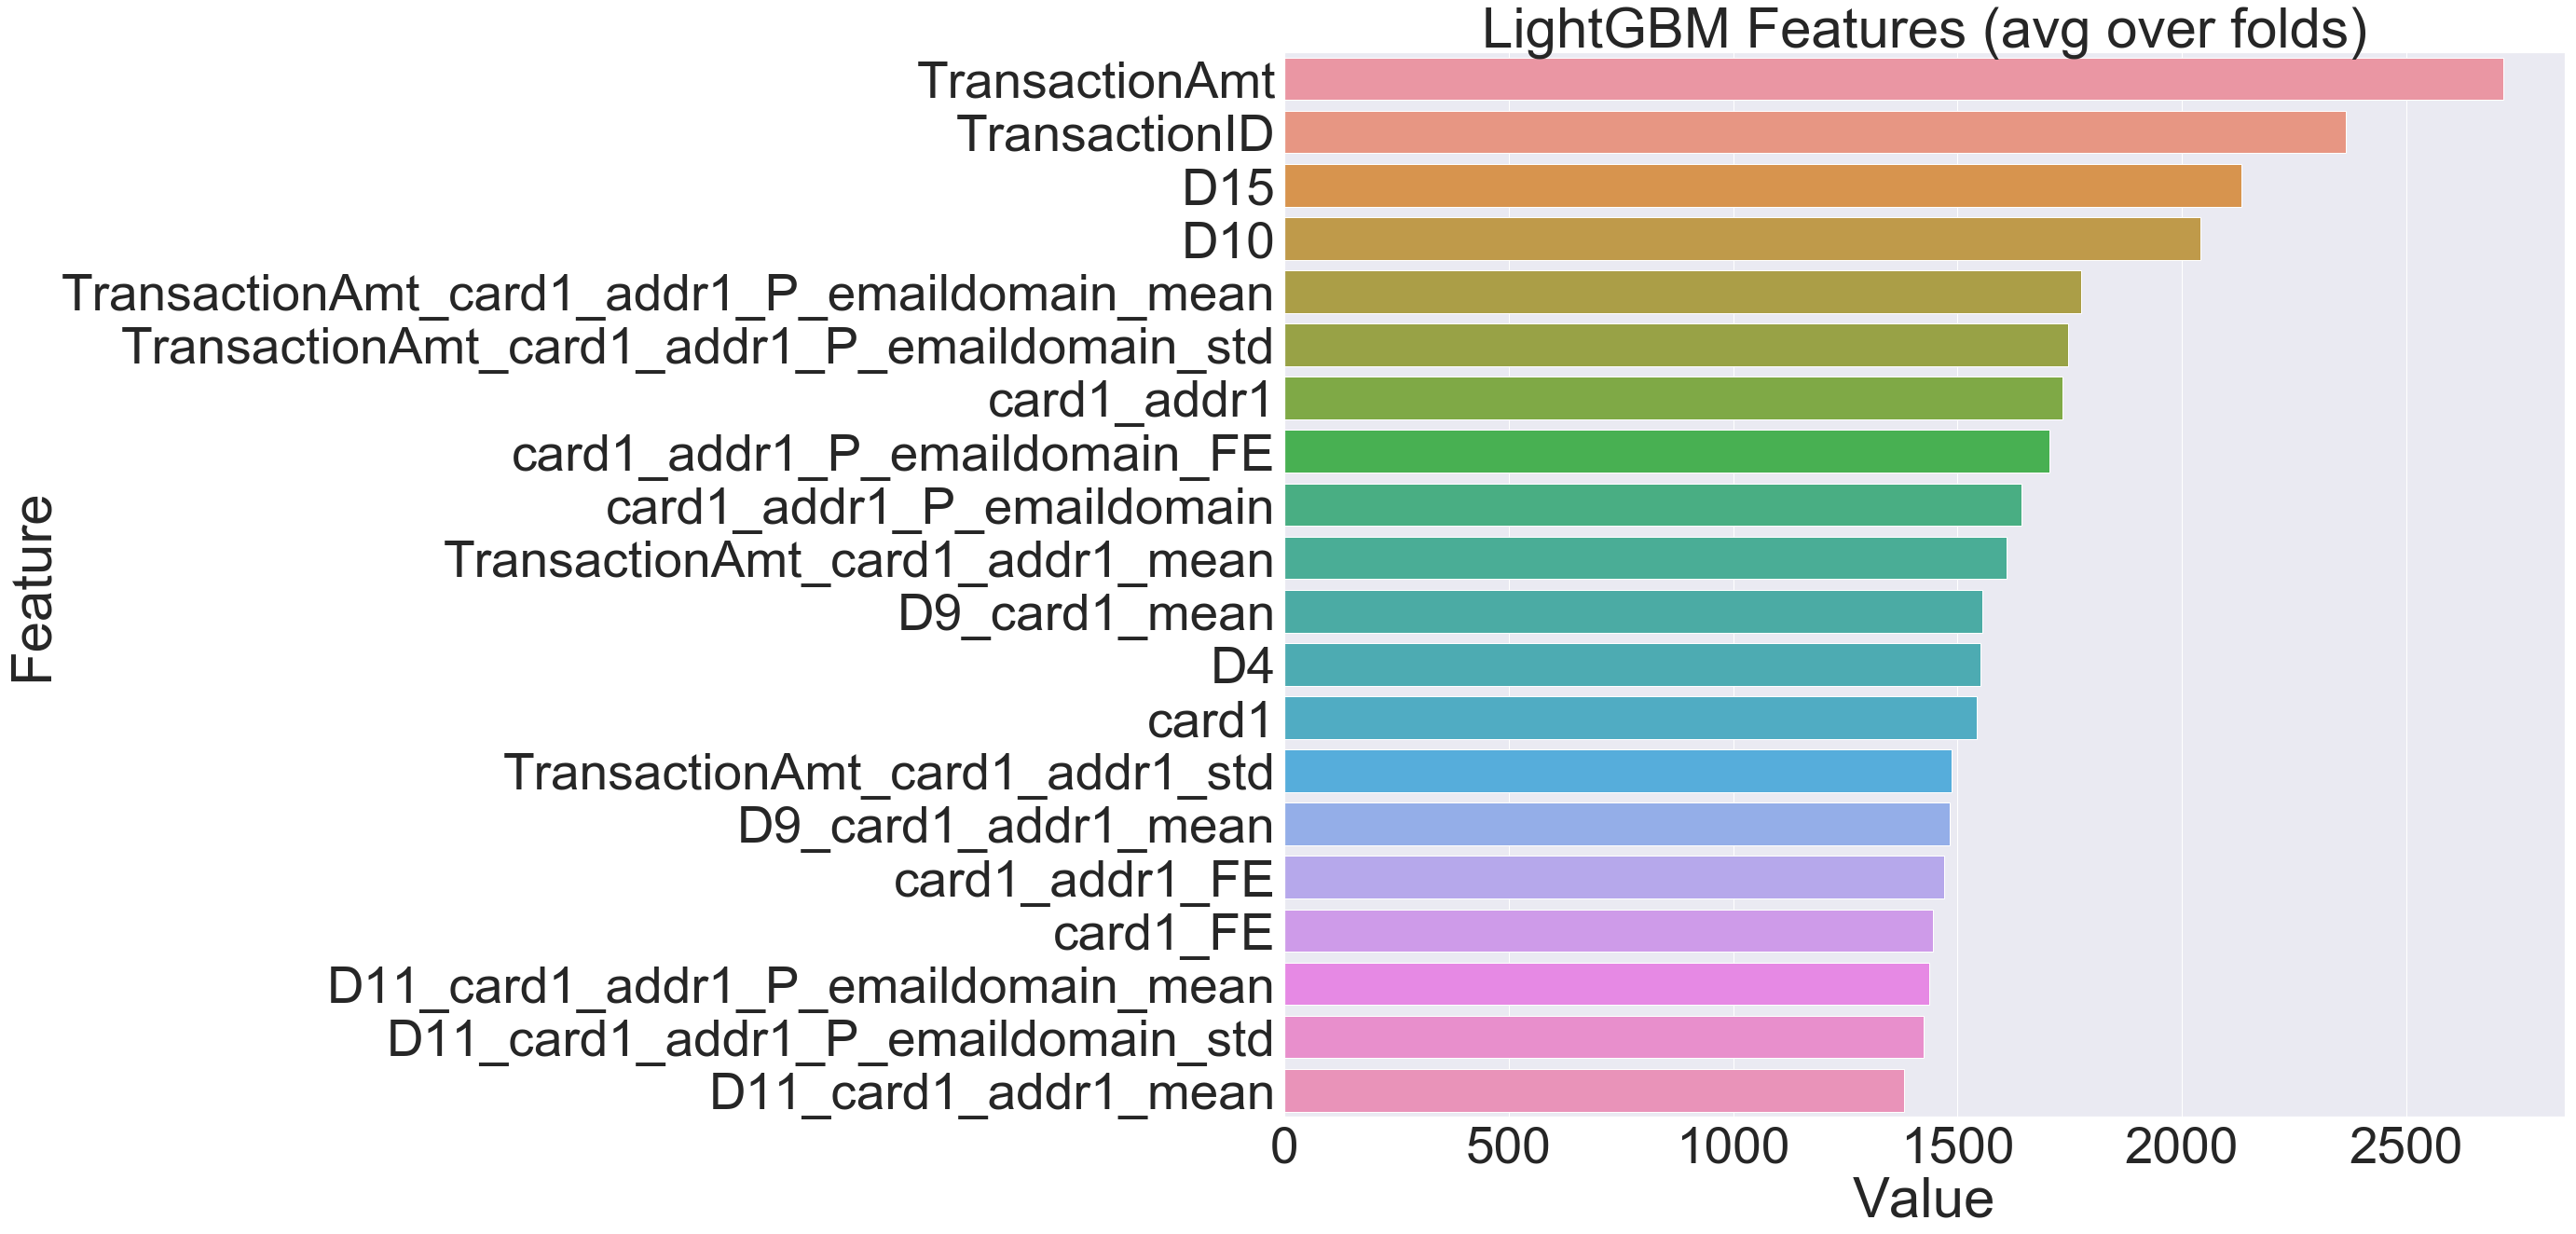

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                    ascending=False)[0:20])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()

In [99]:
def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))

In [100]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train[list(x_train.columns)].astype(int).values,  
mode='classification',training_labels=y_train['isFraud'],feature_names=list(x_train.columns))


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(x_train.loc[i,list(x_train.columns)].astype(int).values, prob, num_features=5)


KeyError: 'isFraud'

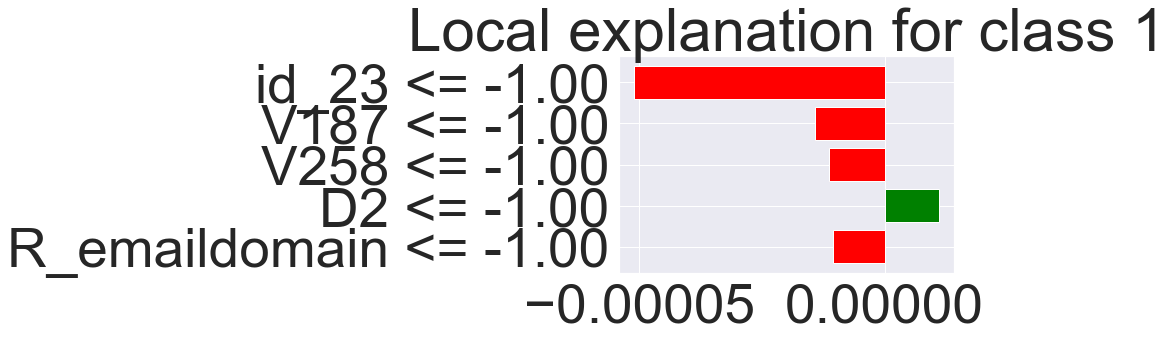

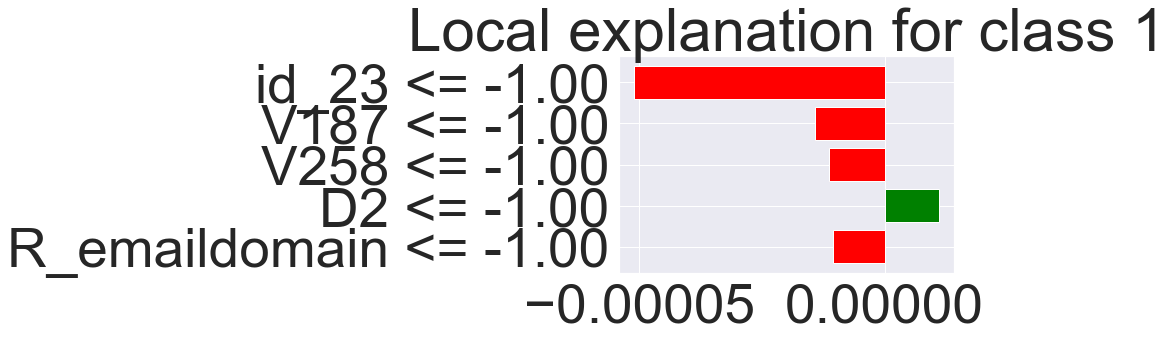

In [25]:
exp.as_pyplot_figure(label=1)

In [26]:
i = 67676
exp = explainer.explain_instance(new_df.loc[i,list(X.columns)].astype(int).values, prob, num_features=10)

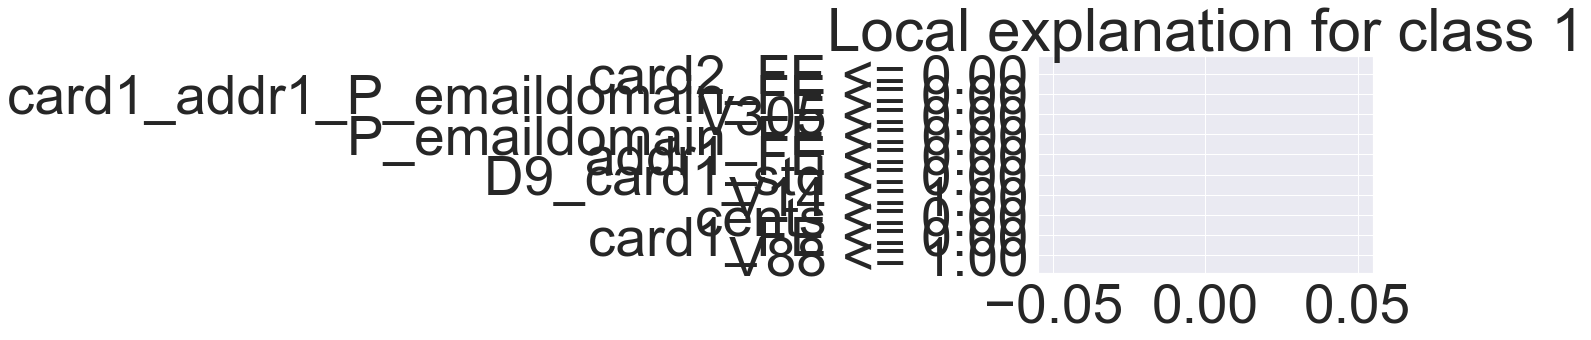

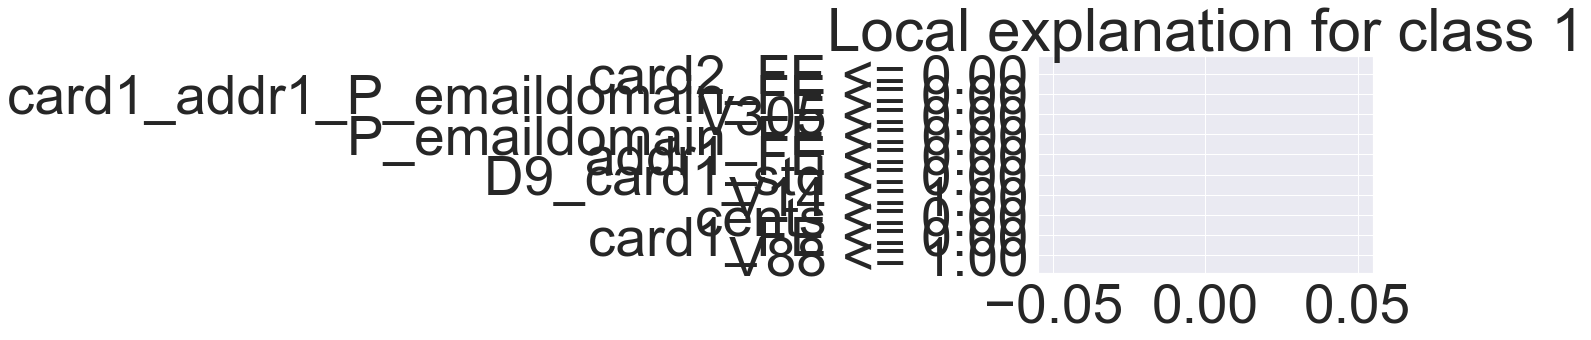

In [27]:
exp.as_pyplot_figure(label=1)

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
# # Code for SP-LIME
# import warnings
# from lime import submodular_pick

# # Remember to convert the dataframe to matrix values
# # SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
# sp_obj = submodular_pick.SubmodularPick(explainer, new_df[list(X.columns)].values, \
# prob, num_features=5,num_exps_desired=10)




In [ ]:
# [exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

In [28]:
import shap

# load JS visualization code to notebook
shap.initjs()


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [29]:
len(shap_values)

590540

In [ ]:
# shap.force_plot(explainer.expected_value, shap_values, X)

In [30]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [43]:

# shap_values_list=np.array(shap_values).tolist()

In [50]:
# len(shap_values_list)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[5,:], X.iloc[5,:])

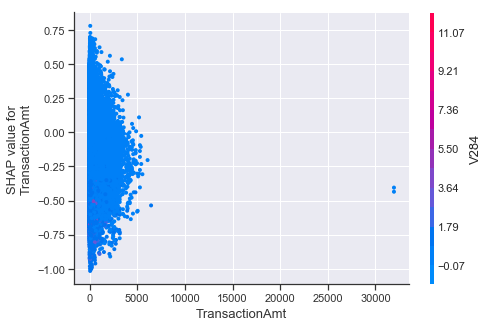

In [31]:
shap.dependence_plot("TransactionAmt", shap_values, X)

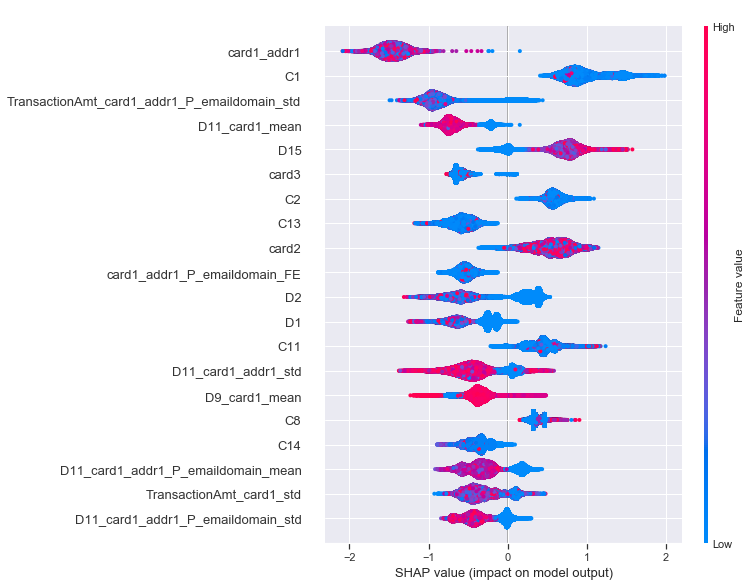

In [85]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

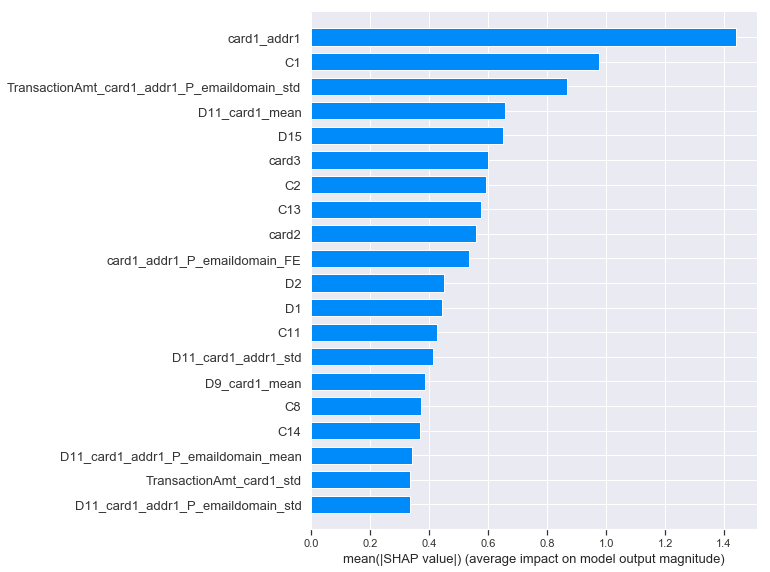

In [86]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
# Code for SP-LIME
import warnings
from lime import submodular_pick

# Remember to convert the dataframe to matrix values
# SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
sp_obj = submodular_pick.SubmodularPick(explainer, df_encoded[list(X.columns)].values, \
prob, num_features=5,num_exps_desired=10)
#sp_obj.sp_explanations[0].as_pyplot_figure(label=1)
#[exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

In [ ]:
sp_obj.sp_explanations[0].as_pyplot_figure(label=1)
#[exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

In [101]:
print(feature_imp)

    Value                   Feature
0      75                     index
1      20                    txn_id
2     185                txn_amount
3       0                  txn_desc
4     588               customer_id
5     404          customer_acct_id
6       0         customer_acct_bal
7       0                 branch_id
8      76           counterparty_id
9      49      counterparty_acct_id
10      0   counterparty_first_name
11      0    counterparty_last_name
12      0        counterparty_state
13    381                  alert_id
14     29                   src_sys
15    144                    src_id
16      0                    end_ts
17     82                 susptype2
18      0                 susptype3
19    164               alert_score
20      0                peer_group
21      0                    desc_1
22      0                    desc_2
23      0                    desc_3
24      0              review_state
25      0                 review_ts
26      0               revi

In [50]:
feature_imp.to_csv("sample_output.csv", index = True, sep=',', encoding='utf-8')
